### Fake News Detection

![Image Description](img.jpg)

### Importing required library
Here I am going to importing some of the required library, if extra library is required to install It will be install later on.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import json

### Inserting fake and real dataset

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Inserting a column called "class" for fake and real news dataset to categories fake and true news. 

In [5]:
df_fake["class"] = 0
df_true["class"] = 1

Removing last 10 rows from both the dataset, for manual testing  

In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [7]:
df_fake_manual_testing = df_fake.tail(100)
for i in range(23480,23380,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(100)
for i in range(21416,21316,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [8]:
df_fake.shape, df_true.shape

((23381, 5), (21317, 5))

Merging the manual testing dataframe in single dataset and save it in a csv file

In [9]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

C:\Users\omsag\AppData\Local\Temp\ipykernel_20856\860779283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
C:\Users\omsag\AppData\Local\Temp\ipykernel_20856\860779283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [10]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23381,Hillary Clinton: “Victory Fund” Gets Massive C...,Wall Street on ParadeAt the Democratic debate ...,Middle-east,"April 8, 2016",0
23382,Windows 10 is Stealing Your Bandwidth (You Mig...,21st Century Wire says We ve heard a lot of no...,Middle-east,"April 7, 2016",0
23383,BOILER ROOM – EP #51 – Social Rejects & Politi...,Tune in to the Alternate Current Radio Network...,Middle-east,"April 6, 2016",0
23384,REVEALED: The CIA Ran LSD Sex Houses in San Fr...,Gary Kamiya SF ChronicleOn an elegant dead-end...,Middle-east,"April 6, 2016",0
23385,Utah Ranchers Vow to Stand Up to Government Ab...,"Sam Levin The GuardianOn 23 January, a group o...",Middle-east,"April 5, 2016",0
23386,FLASHBACK: Florida Couple Nearly ‘Forecloses’ ...,21st Century Wire says After the great crash o...,Middle-east,"April 5, 2016",0
23387,EXPOSED: How US-Backed War on Syria Helped ISI...,ABC News PhotoDaniel Lazare Consortium NewsWh...,Middle-east,"April 4, 2016",0
23388,IRAQ 1991: US Carpet Bombs ‘Highway of Death’,ROAR MagI want to give testimony on what are c...,Middle-east,"April 3, 2016",0
23389,"David Icke on The Hillary, Donald & Bernie Show",21st Century Wire says Author David Icke break...,Middle-east,"April 2, 2016",0
23390,"WHEN IN ROME: Erdogan Thugs Rough-up Press, Pr...","21st Century Wire says NATO s ugly stepchild, ...",Middle-east,"April 1, 2016",0


In [11]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21317,Saudi-led force admits strike in Yemen's capit...,RIYADH (Reuters) - A Saudi-led Arab coalition ...,worldnews,"August 26, 2017",1
21318,Italy's interior minister meets Libyan mayors ...,MILAN (Reuters) - Italian Interior Minister Ma...,worldnews,"August 26, 2017",1
21319,"After Yemeni air strike, little girl is family...",SANAA (Reuters) - Her bruised eyes still swoll...,worldnews,"August 26, 2017",1
21320,Man with sword injures police outside UK Queen...,(Reuters) - A man who assaulted police officer...,worldnews,"August 25, 2017",1
21321,Chinese government advisor says more Mandarin ...,BEIJING (Reuters) - Not enough effort is being...,worldnews,"August 26, 2017",1
21322,Thousands rally for gay marriage in Australia ...,SYDNEY (Reuters) - Thousands of people rallied...,worldnews,"August 26, 2017",1
21323,More than a thousand turn Philippine funeral t...,MANILA (Reuters) - More than a thousand people...,worldnews,"August 26, 2017",1
21324,"U.S. Black Hawk helicopter crashes off Yemen, ...",WASHINGTON (Reuters) - A U.S. Black Hawk helic...,worldnews,"August 26, 2017",1
21325,Prosecutors target Guatemala president over ca...,GUATEMALA CITY (Reuters) - Guatemala s attorne...,worldnews,"August 25, 2017",1
21326,Trump slaps sanctions on Venezuela; Maduro see...,CARACAS/WASHINGTON/ (Reuters) - U.S. President...,worldnews,"August 25, 2017",1


In [12]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

Merging the main fake and true dataframe

In [13]:
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [14]:
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

#### "title",  "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [15]:
df = df_marge.drop(["title","subject","date"], axis = 1)

In [16]:
df.isnull().sum()

text     0
class    0
dtype: int64

#### Randomly shuffling the dataframe 

In [17]:
df = df.sample(frac = 1)

In [18]:
df.head()

,text,class
19923,BERLIN (Reuters) - Support for Chancellor Ange...,1
9024,WASHINGTON (Reuters) - U.S. House of Represent...,1
8535,Fox News pundit and co-host Stacey Dash attrac...,0
15256,This is the result of weak leadership in the W...,0
16623,James Rosen reports on missing money meant for...,0


In [19]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [20]:
df.columns

Index(['text', 'class'], dtype='object')

In [21]:
df.shape

(44698, 2)

In [22]:
df.head()

,text,class
0,BERLIN (Reuters) - Support for Chancellor Ange...,1
1,WASHINGTON (Reuters) - U.S. House of Represent...,1
2,Fox News pundit and co-host Stacey Dash attrac...,0
3,This is the result of weak leadership in the W...,0
4,James Rosen reports on missing money meant for...,0


#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [23]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [24]:
df["text"] = df["text"].apply(wordopt)

#### Defining dependent and independent variable as x and y

In [25]:
x = df["text"]
y = df["class"]

#### Splitting the dataset into training set and testing set. 

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)
print(x_test)

26676    republican presidential front runner donald tr...
14049    washington  reuters    president donald trump ...
24205    london  reuters    calling himself a  proud sa...
314      manila  reuters    four people were killed and...
25073    harare  reuters    zimbabwe president robert m...
                               ...                        
15159     century wire says you can imagine how nations...
39702     no one listened we had many chances to expose...
31203    president barack obama hasn t exactly kept his...
31893    it s always interesting when people decide to ...
24428    washington  reuters    u s  president elect do...
Name: text, Length: 13410, dtype: object


#### Convert text to vectors

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import re
import string

In [28]:
vectorization = TfidfVectorizer(max_features=20, max_df=0.3, min_df=20)   # More restrictive TF-IDF
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
# Perform t-SNE on the TF-IDF features
"""tsne = TSNE(n_components=2, random_state=0)
xv_test_2d = tsne.fit_transform(xv_test.toarray())

# Create a DataFrame for plotting
df_tsne = pd.DataFrame(xv_test_2d, columns=['Dim1', 'Dim2'])

# Plotting the t-SNE result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dim1', y='Dim2', data=df_tsne, alpha=0.7)
plt.title('t-SNE Visualization of TF-IDF Features')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
print(xv_test)""""

SyntaxError: unterminated string literal (detected at line 18) (1711082902.py, line 18)

### 1. Logistic Regression

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression(C=0.001, max_iter=200,warm_start=True)
LR.fit(xv_train,y_train)

LogisticRegression(C=0.001, max_iter=200, warm_start=True)

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.7114093959731543

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75      6934
           1       0.75      0.60      0.67      6476

    accuracy                           0.71     13410
   macro avg       0.72      0.71      0.71     13410
weighted avg       0.72      0.71      0.71     13410



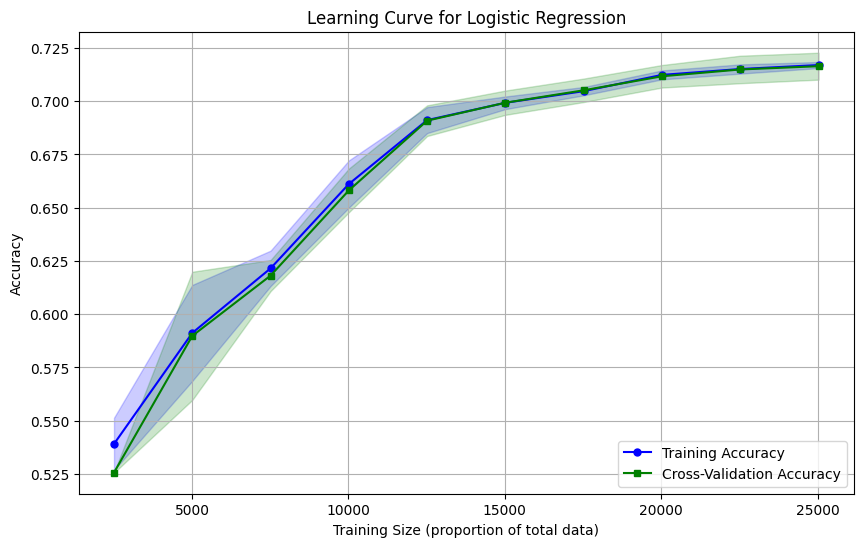

In [ ]:
# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(LR, xv_train, y_train, train_sizes=train_sizes, cv=5, n_jobs=-1, scoring='accuracy')

# Compute the mean and standard deviation of the scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Cross-Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Size (proportion of total data)')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 2. Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier(max_depth=5, min_samples_split=10, max_features=10)
DT.fit(xv_train, y_train)

# Get the underlying DecisionTree object
tree = DT.tree_

# Get the number of nodes in the tree
num_nodes = tree.node_count

print(f"Number of nodes in the tree: {num_nodes}")


Number of nodes in the tree: 63


In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.6847129008202834

In [ ]:
accuracy = DT.score(xv_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, pred_dt))

Accuracy: 68.47%
              precision    recall  f1-score   support

           0       0.66      0.81      0.73      6934
           1       0.73      0.55      0.63      6476

    accuracy                           0.68     13410
   macro avg       0.69      0.68      0.68     13410
weighted avg       0.69      0.68      0.68     13410



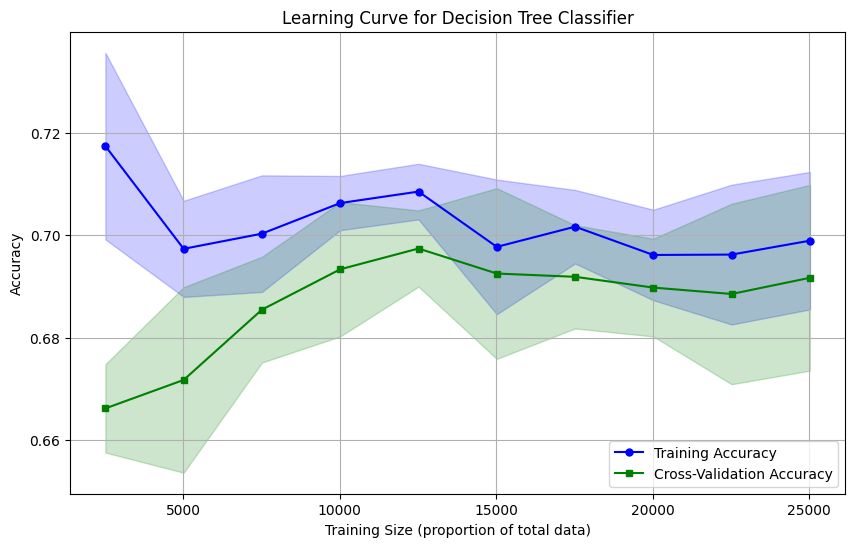

In [ ]:
# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(DT, xv_train, y_train, train_sizes=train_sizes, cv=5, n_jobs=-1, scoring='accuracy')

# Compute the mean and standard deviation of the scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Cross-Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.title('Learning Curve for Decision Tree Classifier')
plt.xlabel('Training Size (proportion of total data)')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 3. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC = GradientBoostingClassifier(
    n_estimators=100,     # fewer trees
    learning_rate=0.01,   # higher learning rate
    max_depth=1,         # shallower trees
    random_state=0
)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, random_state=0)

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test)

0.6501118568232662

In [ ]:
print(f'Accuracy: {GBC.score(xv_test, y_test) * 100:.2f}%')
print(classification_report(y_test, pred_gbc))

Accuracy: 65.01%
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      6934
           1       0.74      0.43      0.54      6476

    accuracy                           0.65     13410
   macro avg       0.68      0.64      0.63     13410
weighted avg       0.67      0.65      0.63     13410



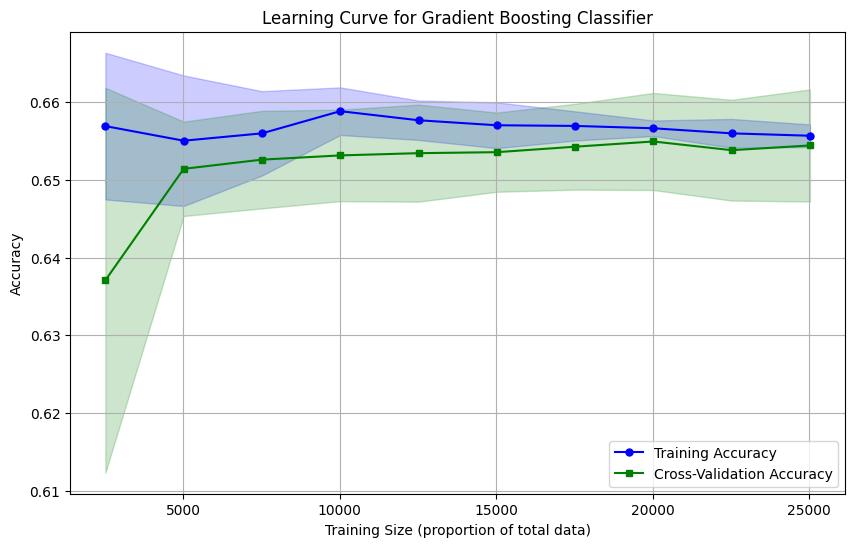

In [ ]:
# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(GBC, xv_train, y_train, train_sizes=train_sizes, cv=5, n_jobs=-1, scoring='accuracy')

# Compute the mean and standard deviation of the scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Cross-Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.title('Learning Curve for Gradient Boosting Classifier')
plt.xlabel('Training Size (proportion of total data)')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### 4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
for n_trees in [10]:
    RFC = RandomForestClassifier(n_estimators=n_trees, random_state=0)
    RFC.fit(xv_train, y_train)
    pred_rfc = RFC.predict(xv_test)

In [ ]:
#pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

0.7648769574944072

In [ ]:
print(f'Accuracy: {RFC.score(xv_test, y_test) * 100:.2f}%')
print(classification_report(y_test, pred_rfc))

Accuracy: 76.49%
              precision    recall  f1-score   support

           0       0.74      0.83      0.79      6934
           1       0.79      0.69      0.74      6476

    accuracy                           0.76     13410
   macro avg       0.77      0.76      0.76     13410
weighted avg       0.77      0.76      0.76     13410



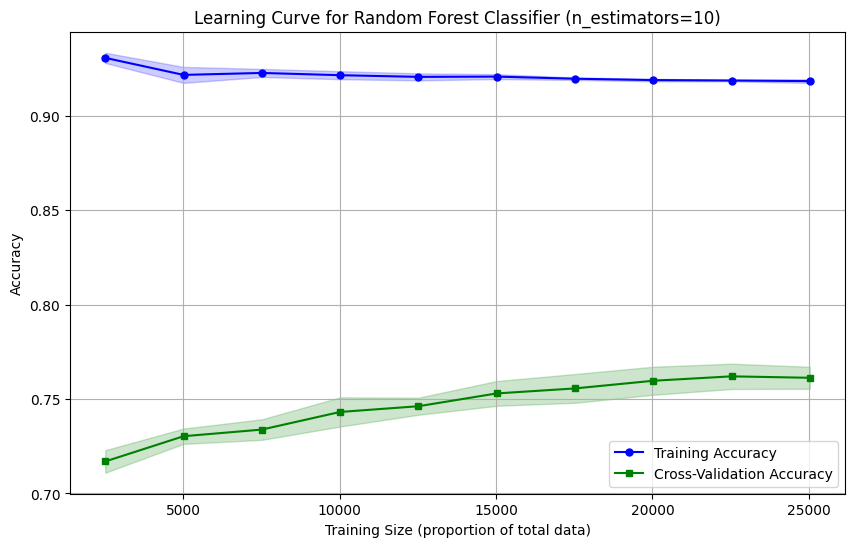

In [ ]:
# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(RFC, xv_train, y_train, train_sizes=train_sizes, cv=5, n_jobs=-1, scoring='accuracy')

# Compute the mean and standard deviation of the scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Cross-Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.title('Learning Curve for Random Forest Classifier (n_estimators=10)')
plt.xlabel('Training Size (proportion of total data)')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define the SVM model
SVM = SVC(kernel='rbf', C=1, gamma=0.1)

# Fit the SVM model to the training data
SVM.fit(xv_train, y_train)

# Predict on the test data
pred_svm = SVM.predict(xv_test)

# Print the classification report
print(classification_report(y_test, pred_svm))

# Define the training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(SVM, xv_train, y_train, train_sizes=train_sizes, cv=5, n_jobs=-1, scoring='accuracy')

# Compute the mean and standard deviation of the scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Cross-Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.title('Learning Curve for Support Vector Machine')
plt.xlabel('Training Size (proportion of total data)')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Model Testing With Manual Entry

### News

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_SVM = SVM.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {} \nSVM Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0]),
                                                                                                              output_lable(pred_SVM[0])
                                                                                                              )
                                                                                                              )

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---- ----------------------------------- 1.3/12.8 MB 8.4 MB/s eta 0:00:02
     --------------- ------------------------ 5.0/12.8 MB 13.8 MB/s eta 0:00:01
     -------------------------- ------------- 8.4/12.8 MB 14.9 MB/s eta 0:00:01
     ------------------------------ --------- 9.7/12.8 MB 12.1 MB/s eta 0:00:01
     ---------------------------------- ---- 11.3/12.8 MB 11.0 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 10.5 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 9.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
def NER(text, output_file='NER.json'):
    import spacy
    # Load the spaCy model
    nlp = spacy.load('en_core_web_sm')
    
    # Process the text
    doc = nlp(text)
    
    # Extract entities and create key-value pairs
    entities = {ent.text: ent.label_ for ent in doc.ents}
    
    # Save the entities to a JSON file
    with open(output_file, 'w') as f:
        json.dump(entities, f)
    
    return entities



In [ ]:
news = str(input())
NER(news)
manual_testing(news)


KeyboardInterrupt: 